In [154]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime
import datetime

import ipywidgets

%matplotlib widget
import numpy as np
from sklearn import preprocessing

# data transformation

In [19]:
price_df= pd.read_csv("aluminium_price.csv")

price_df = price_df[['Month','Price']]
price_df = price_df.set_index('Month')
price_df.index = pd.to_datetime(price_df.index)
#df.Price = df.Price.str.replace(',', '')
price_df.Price = price_df.Price.astype(float)


In [20]:

production_df = pd.read_csv("aluminuim_production.csv")
production_df=  production_df.set_index('date')
production_df.index = pd.to_datetime(production_df.index,format='%d/%m/%Y')
production_df['sum'] = production_df[list(production_df.columns)].sum(axis=1)
production_df = production_df.loc['1997-10-01':'2022-09-01']
production_df =  production_df['sum']



In [21]:
energy_df = pd.read_csv("Global price of Energy index.csv")

energy_df =  energy_df.set_index('DATE')
energy_df.index = pd.to_datetime(energy_df.index,format='%Y/%m/%d')
energy_df = energy_df.loc['1997-10-01':'2022-09-01']
energy_df= energy_df.rename(columns={'PNRGINDEXM': 'energy_price'})


In [22]:
gdp_df = pd.read_csv("world gdp monthly.csv")
#gdp_df = gdp_df.set_index('Date')
gdp_df.Date = pd.to_datetime(gdp_df.Date,format='%Y-%m-%d')
for i in range(0,gdp_df.shape[0]):
    gdp_df.at[i,'Date'] = gdp_df['Date'].iloc[i].replace(day=1)

gdp_df.sort_values('Date', ascending=True)
gdp_df = gdp_df.set_index('Date')
gdp_df = gdp_df.rename(columns={'Value': 'world_gdp'})

gdp_df = gdp_df.loc['1997-10-01':]



In [23]:
us_dollar_index_df = pd.read_csv("US Dollar Index Historical Data.csv")
us_dollar_index_df = us_dollar_index_df[['Date','Price']]
us_dollar_index_df = us_dollar_index_df.rename(columns={'Price':'us_dollar_index'})
us_dollar_index_df=  us_dollar_index_df.set_index('Date')
us_dollar_index_df.index = pd.to_datetime(us_dollar_index_df.index,format='%m/%d/%Y')
us_dollar_index_df = us_dollar_index_df.loc['1997-10-01':]
us_dollar_index_df

us_dollar_index
Date                       
2022-11-01           106.63
2022-10-01           111.54
2022-09-01           112.12
2022-08-01           108.85
2022-07-01           106.00
...                     ...
1998-02-01            99.82
1998-01-01           100.79
1997-12-01            99.65
1997-11-01            97.79
1997-10-01            95.64

[302 rows x 1 columns]

In [24]:
usd_canadian_df = pd.read_csv("usd_canadian_dollar.csv")
usd_canadian_df = usd_canadian_df[['Date','Close']]
usd_canadian_df = usd_canadian_df.rename(columns={'Close':'usd_canadian_exchange_rate'})
usd_canadian_df['Date'] = pd.to_datetime(usd_canadian_df.Date, format='%Y-%m-%d')
usd_canadian_df['YearMonth'] = pd.to_datetime(usd_canadian_df['Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
usd_canadian_df = usd_canadian_df.groupby('YearMonth')['usd_canadian_exchange_rate'].sum()
usd_canadian_df.index = pd.to_datetime(usd_canadian_df.index,format='%Y/%m')
usd_canadian_df

YearMonth
2003-10-01    30.41190
2003-11-01    26.25250
2003-12-01    30.17210
2003-09-01    13.53920
2004-01-01    28.52690
                ...   
2022-05-01    28.27628
2022-06-01    28.16774
2022-07-01    27.16295
2022-08-01    29.69545
2022-09-01    29.26261
Name: usd_canadian_exchange_rate, Length: 231, dtype: float64

In [25]:
usd_india_df = pd.read_csv("usd_india_rupee.csv")
usd_india_df = usd_india_df[['Date','Close']]
usd_india_df = usd_india_df.rename(columns={'Close':'usd_india_exchange_rate'})
usd_india_df['Date'] = pd.to_datetime(usd_india_df.Date, format='%Y-%m-%d')
usd_india_df['YearMonth'] = pd.to_datetime(usd_india_df['Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
usd_india_df = usd_india_df.groupby('YearMonth')['usd_india_exchange_rate'].sum()
usd_india_df.index = pd.to_datetime(usd_india_df.index,format='%Y/%m')
usd_india_df

YearMonth
2021-11-01     373.614296
2021-12-01    1734.050499
2022-01-01    1563.351577
2022-10-01    1727.594598
2022-11-01    1470.182288
2022-02-01    1498.348511
2022-03-01    1752.021103
2022-04-01    1599.490577
2022-05-01    1699.584098
2022-06-01    1716.504686
2022-07-01    1670.703913
2022-08-01    1828.729005
2022-09-01    1763.717697
Name: usd_india_exchange_rate, dtype: float64

In [26]:
usd_russian_df = pd.read_csv("usd_russian_ruble.csv")
usd_russian_df = usd_russian_df[['Date','Close']]
usd_russian_df = usd_russian_df.rename(columns={'Close':'usd_russian_exchange_rate'})
usd_russian_df['Date'] = pd.to_datetime(usd_russian_df.Date, format='%Y-%m-%d')
usd_russian_df['YearMonth'] = pd.to_datetime(usd_russian_df['Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
usd_russian_df = usd_russian_df.groupby('YearMonth')['usd_russian_exchange_rate'].sum()
usd_russian_df.index = pd.to_datetime(usd_russian_df.index,format='%Y/%m')
usd_russian_df

YearMonth
2003-12-01     676.260005
2004-01-01     605.130002
2004-10-01     435.281006
2004-11-01     628.319999
2004-12-01     641.662498
                 ...     
2022-05-01    1439.304755
2022-06-01    1323.214006
2022-07-01    1289.686796
2022-08-01    1398.605101
2022-09-01    1321.370002
Name: usd_russian_exchange_rate, Length: 228, dtype: float64

In [27]:
usd_eur_df = pd.read_csv("usd-eur_exchange_rates.csv")
usd_eur_df = usd_eur_df[['Date','Close']]
usd_eur_df = usd_eur_df.rename(columns={'Close':'usd_eur_exchange_rate'})
usd_eur_df['Date'] = pd.to_datetime(usd_eur_df.Date, format='%Y-%m-%d')
usd_eur_df['YearMonth'] = pd.to_datetime(usd_eur_df['Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
usd_eur_df = usd_eur_df.groupby('YearMonth')['usd_eur_exchange_rate'].sum()
usd_eur_df.index = pd.to_datetime(usd_eur_df.index,format='%Y/%m')
usd_eur_df

YearMonth
2003-12-01    18.68141
2004-01-01    17.45101
2004-10-01    16.00921
2004-11-01    16.92204
2004-12-01    17.14439
                ...   
2022-05-01    20.80944
2022-06-01    20.80244
2022-07-01    20.60116
2022-08-01    22.71245
2022-09-01    22.20072
Name: usd_eur_exchange_rate, Length: 228, dtype: float64

In [28]:
df =  pd.concat([price_df,production_df,energy_df,gdp_df,us_dollar_index_df,usd_canadian_df,usd_india_df,usd_eur_df,usd_russian_df], axis=1)
df = df.rename(columns={'Price': 'aluminum_price', 'sum': 'world_production'})
df


aluminum_price  world_production  energy_price  world_gdp  \
1997-10-01         1607.86            1873.0     53.429404  51.946298   
1997-11-01         1598.99            1829.0     51.295632  52.074594   
1997-12-01         1530.51            1886.0     46.373656  52.157845   
1998-01-01         1485.79            1921.0     42.128222  52.116865   
1998-02-01         1465.56            1760.0     40.329750  52.169421   
...                    ...               ...           ...        ...   
2022-07-01         2408.42            5889.0    343.809997        NaN   
2022-08-01         2430.79            5901.0    376.412083        NaN   
2022-09-01         2228.09            5669.0    330.149586        NaN   
2022-10-01             NaN               NaN           NaN        NaN   
2022-11-01             NaN               NaN           NaN        NaN   

            us_dollar_index  usd_canadian_exchange_rate  \
1997-10-01            95.64                         NaN   
1997-11-01            97.79                         NaN   
1997-12-01            99.65                         NaN   
1998-01-01           100.79                         NaN   
1998-02-01            99.82                         NaN   
...                     ...                         ...   
2022-07-01           106.00                    27.16295   
2022-08-01           108.85                    29.69545   
2022-09-01           112.12                    29.26261   
2022-10-01           111.54                    28.76609   
2022-11-01           106.63                    24.20075   

            usd_india_exchange_rate  usd_eur_exchange_rate  \
1997-10-01                      NaN                    NaN   
1997-11-01                      NaN                    NaN   
1997-12-01                      NaN                    NaN   
1998-01-01                      NaN                    NaN   
1998-02-01                      NaN                    NaN   
...                             ...                    ...   
2022-07-01              1670.703913               20.60116   
2022-08-01              1828.729005               22.71245   
2022-09-01              1763.717697               22.20072   
2022-10-01              1727.594598               21.34455   
2022-11-01              1470.182288               15.81389   

            usd_russian_exchange_rate  
1997-10-01                        NaN  
1997-11-01                        NaN  
1997-12-01                        NaN  
1998-01-01                        NaN  
1998-02-01                        NaN  
...                               ...  
2022-07-01                1289.686796  
2022-08-01                1398.605101  
2022-09-01                1321.370002  
2022-10-01                1295.594816  
2022-11-01                1100.375005  

[302 rows x 9 columns]

# data analysis 1

In [157]:
df = pd.read_csv("combination1.csv", index_col = 'Unnamed: 0')
df.tail(10)

aluminum_price  world_production  energy_price  world_gdp  \
2022-02-01         3245.79            5135.0    260.048363        NaN   
2022-03-01         3498.37            5744.0    331.783759        NaN   
2022-04-01         3244.41            5609.0    300.533178        NaN   
2022-05-01         2830.32            5818.0    306.674979        NaN   
2022-06-01         2563.44            5651.0    328.123480        NaN   
2022-07-01         2408.42            5889.0    343.809997        NaN   
2022-08-01         2430.79            5901.0    376.412083        NaN   
2022-09-01         2228.09            5669.0    330.149586        NaN   
2022-10-01             NaN               NaN           NaN        NaN   
2022-11-01             NaN               NaN           NaN        NaN   

            us_dollar_index  usd_canadian_exchange_rate  \
2022-02-01            96.71                    25.44506   
2022-03-01            98.31                    29.11507   
2022-04-01           102.96                    26.49413   
2022-05-01           101.75                    28.27628   
2022-06-01           104.68                    28.16774   
2022-07-01           106.00                    27.16295   
2022-08-01           108.85                    29.69545   
2022-09-01           112.12                    29.26261   
2022-10-01           111.54                    28.76609   
2022-11-01           106.63                    24.20075   

            usd_india_exchange_rate  usd_eur_exchange_rate  \
2022-02-01              1498.348511               17.63761   
2022-03-01              1752.021103               20.86464   
2022-04-01              1599.490577               19.39820   
2022-05-01              1699.584098               20.80944   
2022-06-01              1716.504686               20.80244   
2022-07-01              1670.703913               20.60116   
2022-08-01              1828.729005               22.71245   
2022-09-01              1763.717697               22.20072   
2022-10-01              1727.594598               21.34455   
2022-11-01              1470.182288               15.81389   

            usd_russian_exchange_rate  
2022-02-01                1549.326784  
2022-03-01                2553.308252  
2022-04-01                1693.989923  
2022-05-01                1439.304755  
2022-06-01                1323.214006  
2022-07-01                1289.686796  
2022-08-01                1398.605101  
2022-09-01                1321.370002  
2022-10-01                1295.594816  
2022-11-01                1100.375005

In [156]:
df.columns

Index(['aluminum_price', 'world_production', 'energy_price', 'world_gdp',
       'us_dollar_index', 'usd_canadian_exchange_rate',
       'usd_india_exchange_rate', 'usd_eur_exchange_rate',
       'usd_russian_exchange_rate'],
      dtype='object')

In [4]:
cols = ['aluminum_price', 'world_production', 'energy_price', 'world_gdp',
       'us_dollar_index', 'usd_canadian_exchange_rate',
       'usd_india_exchange_rate', 'usd_eur_exchange_rate',
       'usd_russian_exchange_rate']


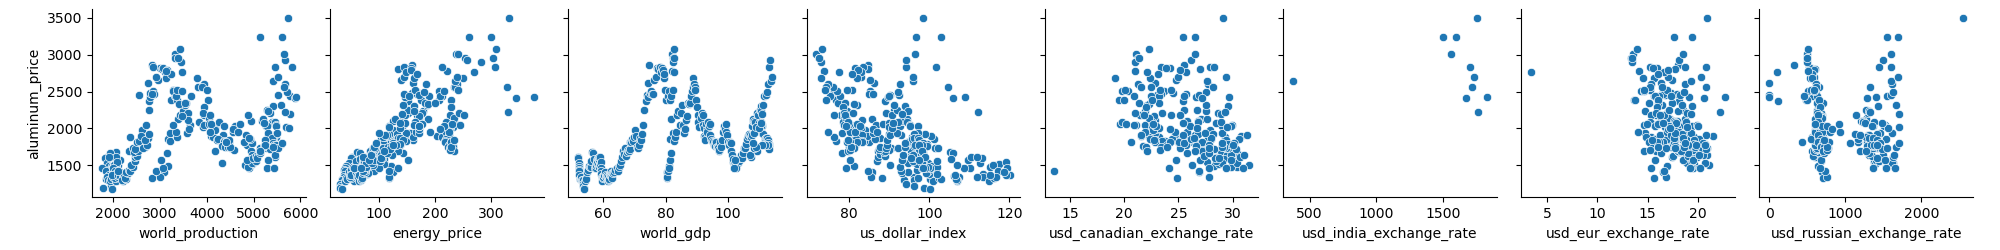

In [6]:
sns.pairplot(data=df,
                  y_vars=['aluminum_price'],
                  x_vars=['world_production', 'energy_price', 'world_gdp',
       'us_dollar_index', 'usd_canadian_exchange_rate',
       'usd_india_exchange_rate', 'usd_eur_exchange_rate',
       'usd_russian_exchange_rate'])

In [5]:
df_corr = df[cols].corr()
df_corr[['aluminum_price']].style.background_gradient(cmap='Blues')

# data analysis 2

In [132]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### simple regression for 'aluminum_price','energy_price','us_dollar_index'

In [134]:
df = pd.read_csv("combination.csv", index_col = 'Unnamed: 0')
df = df[['aluminum_price','energy_price','us_dollar_index']].dropna()
df

aluminum_price  energy_price  us_dollar_index
1997-10-01         1607.86     53.429404            95.64
1997-11-01         1598.99     51.295632            97.79
1997-12-01         1530.51     46.373656            99.65
1998-01-01         1485.79     42.128222           100.79
1998-02-01         1465.56     40.329750            99.82
...                    ...           ...              ...
2022-05-01         2830.32    306.674979           101.75
2022-06-01         2563.44    328.123480           104.68
2022-07-01         2408.42    343.809997           106.00
2022-08-01         2430.79    376.412083           108.85
2022-09-01         2228.09    330.149586           112.12

[300 rows x 3 columns]

In [135]:
x_values = df[['energy_price','us_dollar_index']].values
y_values = df['aluminum_price'].values

regression_model = LinearRegression()
regression_model.fit(x_values, y_values)


LinearRegression()

In [136]:

print('coef:', regression_model.coef_)
print('intercept:', regression_model.intercept_)



coef: [ 4.61568059 -4.7615037 ]
intercept: 1696.3688087152902


In [137]:


def aluminuim_price(energy_price, us_dollar_index ):
    aluminuim_price = 1696.4 + energy_price*4.6 - us_dollar_index*4.8
    return aluminuim_price 

# need to set benckmark
def aluminuim_price_percent(energy_price_percent, us_dollar_index_percent):
    
    
    energy_price = 330
    us_dollar_index = 112
    aluminuim_price1 = 2228
    energy_price = (1+energy_price_percent)*energy_price
    us_dollar_index = (1+us_dollar_index_percent)*us_dollar_index

    aluminuim_price2 = 1696.4 + energy_price*4.6 - us_dollar_index*4.8
    aluminuim_price_percent = (aluminuim_price1-aluminuim_price2)/aluminuim_price1

    return aluminuim_price_percent



In [138]:
aluminuim_price_percent(-0.1,-0.2)

-0.18156193895870734

### simple regression for 'aluminum_price','energy_price','us_dollar_index', 'world_production','world_gdp'''

In [139]:
df = pd.read_csv("combination.csv", index_col = 'Unnamed: 0')
df = df[['aluminum_price','energy_price','us_dollar_index','world_production','world_gdp']].dropna()
df

aluminum_price  energy_price  us_dollar_index  world_production  \
1997-10-01         1607.86     53.429404            95.64            1873.0   
1997-11-01         1598.99     51.295632            97.79            1829.0   
1997-12-01         1530.51     46.373656            99.65            1886.0   
1998-01-01         1485.79     42.128222           100.79            1921.0   
1998-02-01         1465.56     40.329750            99.82            1760.0   
...                    ...           ...              ...               ...   
2021-08-01         2602.99    183.806515            92.63            5675.0   
2021-09-01         2834.56    212.879064            94.23            5468.0   
2021-10-01         2934.39    256.460754            94.12            5673.0   
2021-11-01         2636.45    235.683332            95.99            5406.0   
2021-12-01         2695.53    239.991032            95.97            5521.0   

             world_gdp  
1997-10-01   51.946298  
1997-11-01   52.074594  
1997-12-01   52.157845  
1998-01-01   52.116865  
1998-02-01   52.169421  
...                ...  
2021-08-01  112.665979  
2021-09-01  113.007694  
2021-10-01  113.250761  
2021-11-01  113.634570  
2021-12-01  114.072071  

[291 rows x 5 columns]

In [140]:
x_values = df[['energy_price','us_dollar_index','world_production','world_gdp']].values
y_values = df['aluminum_price'].values

regression_model = LinearRegression()
regression_model.fit(x_values, y_values)

LinearRegression()

In [141]:
print('coef:', regression_model.coef_)
print('intercept:', regression_model.intercept_)

coef: [ 4.08579455 -5.47900702 -0.13208274  9.3333935 ]
intercept: 1523.3103378914716


In [151]:


def aluminuim_price(energy_price, us_dollar_index, world_production,world_gdp ):
    aluminuim_price = 1523 + energy_price*4.1 - us_dollar_index*5.5 - world_production*0.13 + world_gdp*9
    return aluminuim_price 


# need to set benckmark
def aluminuim_price_percent(energy_price_percent, us_dollar_index_percent,world_production_percent,world_gdp_percent):
    
    
    energy_price = 330
    us_dollar_index = 112
    world_production = 5521
    world_gdp = 114
    aluminuim_price1 = 2228
    energy_price = (1+energy_price_percent)*energy_price
    us_dollar_index = (1+us_dollar_index_percent)*us_dollar_index
    world_production = (1+world_production_percent)*world_production
    world_gdp  = (1+world_gdp_percent )*world_gdp 



    aluminuim_price2 = 1523 + energy_price*4.1 - us_dollar_index*5.5 - world_production*0.13 + world_gdp*9
    aluminuim_price_percent = (aluminuim_price1-aluminuim_price2)/aluminuim_price1

    return aluminuim_price_percent
    


In [160]:
energy_price_percent = 0.1
us_dollar_index_percent = -0.02
world_production_percent = 0.01
world_gdp_percent = 0.01

print('Percentage change in aluminuim price:',
             aluminuim_price_percent(energy_price_percent, us_dollar_index_percent,world_production_percent,world_gdp_percent))

Percentage change in aluminuim price: -0.2203647666068224


# please ignore the rest 

In [100]:
x_values_energy = df[['energy_price']].values
x_values_us = df[['us_dollar_index']].values

y_values = df['aluminum_price'].values

In [102]:
#define our polynomial model, with whatever degree we want
degree=2

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_values = poly_model.fit_transform(x_values_us)


In [104]:
# importing numpy as geek 
import numpy as geek
x_values = geek.concatenate((x_values_energy, poly_x_values), axis = 1)
x_values

array([[5.34294045e+01, 1.00000000e+00, 9.56400000e+01, 9.14700960e+03],
       [5.12956318e+01, 1.00000000e+00, 9.77900000e+01, 9.56288410e+03],
       [4.63736555e+01, 1.00000000e+00, 9.96500000e+01, 9.93012250e+03],
       ...,
       [3.43809997e+02, 1.00000000e+00, 1.06000000e+02, 1.12360000e+04],
       [3.76412083e+02, 1.00000000e+00, 1.08850000e+02, 1.18483225e+04],
       [3.30149586e+02, 1.00000000e+00, 1.12120000e+02, 1.25708944e+04]])

In [106]:
regression_model = LinearRegression()
regression_model.fit(x_values, y_values)

LinearRegression()

In [107]:
regression_model.intercept_

416.2175290525943

In [108]:
regression_model.coef_

array([ 4.71085735e+00, -1.81729631e-13,  2.21767553e+01, -1.41107494e-01])

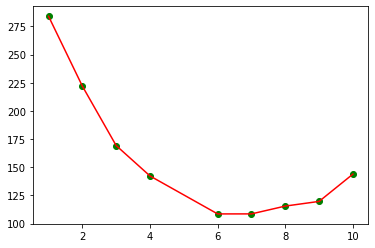

In [34]:
%matplotlib inline
number_degrees = [1,2,3,4,6,7,8,9,10]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

In [36]:
poly_model = PolynomialFeatures(degree=5)

poly_x_values = poly_model.fit_transform(x_values)
poly_model.fit(poly_x_values, y_values)

regression_model = LinearRegression()
regression_model.fit(poly_x_values, y_values)
y_pred = regression_model.predict(poly_x_values)

In [38]:
print("Intercept:", regression_model.intercept_)
print("Coefficients:", regression_model.coef_)


Intercept: -13010.011712428979
Coefficients: [-2.04305149e-03 -4.84803258e-08 -8.07666077e-06  9.83991811e-07
 -4.12162903e-07 -3.91478173e-03 -5.73863459e-04 -1.29593265e-04
  7.18040106e-05 -3.33740506e-05 -1.77071063e-05 -1.98493606e-05
 -4.39201064e-06  1.56040281e-06  1.91104021e-05 -1.89969747e-05
  5.80134837e-05  9.43619278e-04  2.65230324e-04  4.45042762e-03
 -5.46839315e-03 -1.42586208e-02 -9.00047500e-04 -5.25312093e-05
  9.24621944e-03  1.34625684e-04 -2.06041729e-04 -9.43560035e-04
 -2.27035099e-04 -3.84808328e-04 -3.96879619e-04 -5.59833224e-05
 -2.35916573e-05  2.26424967e-04  9.15943500e-04 -4.13510855e-09
  2.17176132e-09  5.68813942e-07  2.91501390e-07 -3.78821994e-06
  3.62333858e-05 -2.96048860e-05 -6.41632036e-05  3.60274047e-05
 -1.42949665e-05  4.42780919e-05 -1.62504030e-04  2.28040415e-04
 -1.44570796e-03  9.31511825e-04  3.91953168e-04  2.33419659e-03
 -2.89028355e-03  1.03307165e-03 -3.24604641e-04 -1.47275747e-05
 -4.80132209e-04 -1.89772399e-03  3.64311117e

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

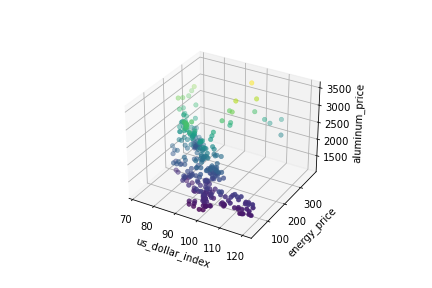

In [161]:
fig = plt.figure()
ax = plt.axes(projection='3d')

z = df['aluminum_price'].values
x = df['us_dollar_index'].values
y= df['energy_price'].values

ax.set_xlabel('us_dollar_index')
ax.set_ylabel('energy_price')
ax.set_zlabel('aluminum_price')

ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

plt.show